In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

df = df.rename(columns={"v1": "label", "v2": "message"})

df = df[["label", "message"]]

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation)) 
    return text

df["clean_msg"] = df["message"].apply(clean_text)

# Convert ham/spam to numeric
df["label_num"] = df["label"].map({"ham": 0, "spam": 1})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_msg"], df["label_num"], test_size=0.25, random_state=42
)


In [5]:
tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [6]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [7]:
y_pred = nb.predict(X_test_tfidf)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.964824120603015

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1202
           1       1.00      0.74      0.85       191

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.96      0.96      1393



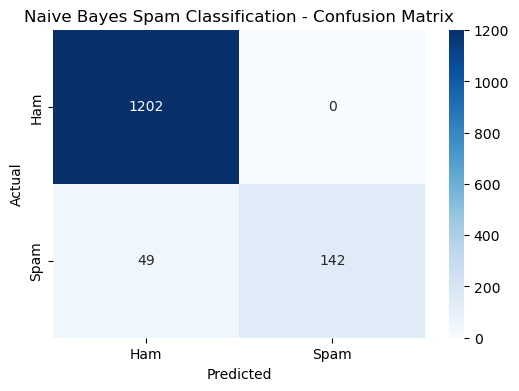

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Spam Classification - Confusion Matrix")
plt.show()

In [17]:
test_message = "You have get a free gift voucher. claim your reward."

clean_test = clean_text(test_message)

test_tfidf = tfidf.transform([clean_test])

prediction = nb.predict(test_tfidf)[0]

if prediction == 1:
    print("\nHardcoded Test Result: SPAM")
else:
    print("\nHardcoded Test Result: HAM (Not Spam)")


Hardcoded Test Result: SPAM
